======Step 1 Understand the dataset======
------Step 1 Q1------
There is no missing value in the dataset as shown below: 
Checking null value:
TransactionID      0
TransactionDate    0
CustomerID         0
Amount             0
dtype: int64

------Step 1 Q2------
The smallest date: 1/1/2011
The largest date: 9/9/2015

------Step 1 Q3------
The number of unique customers: 1000

------Step 1 Q4------
Standard descriptive statistics for the Amount: 
Min:      -1.0
Max:      2033.0
Variance: 1499.54
Std:      38.72
Sum:      37791.55

------Step 1 Q5------
Transaction amounts increase over time in general.



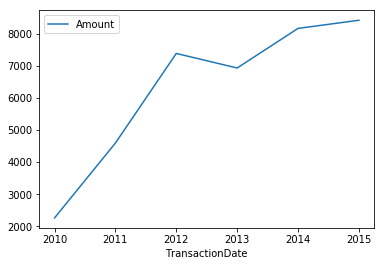

In [3]:
import pandas as pd
clv = pd.read_csv('HW1 clv_transactions.csv',header=0)
print("======Step 1 Understand the dataset======")
#1. Are there any missing values in the dataset?
print("------Step 1 Q1------")
print("There is no missing value in the dataset as shown below: ")
print("Checking null value:")
print(clv.isnull().sum())
print()
#2, What is the range of dates in the dataset?
print("------Step 1 Q2------")
print("The smallest date: " + clv["TransactionDate"].min() +"\nThe largest date: "+clv["TransactionDate"].max())
print()
# 3. How many unique customers are there in the dataset?
print("------Step 1 Q3------")
print("The number of unique customers: " + str(clv["CustomerID"].nunique()))
print()
# 4, Profile the data to give the standard descriptive statistics for the Amount field. 
# What is the min, max, variance, and standard deviations?
print("------Step 1 Q4------")
print("Standard descriptive statistics for the Amount: ")
print('Min:      ' + str(clv["Amount"].min().round(2)))
print('Max:      ' + str( clv["Amount"].max().round(2)))
print('Variance: ' + str(clv["Amount"].var().round(2)))
print('Std:      ' + str(clv["Amount"].std().round(2)))
print('Sum:      ' + str(clv["Amount"].sum().round(2)))
print()
#5. Do transaction amounts in general increase over time (perhaps due to inflation)?
print("------Step 1 Q5------")
print("Transaction amounts increase over time in general.")
clv1 = clv.copy()
clv1['TransactionDate'] = pd.to_datetime(clv1['TransactionDate'])
x = clv1.groupby('TransactionDate')[['Amount']].sum()
z= x.groupby([x.index.year])[['Amount']].sum()
z.plot()
print()

======Step 2 Explore the dataset======
------Step 2 Q1------
There are outlier for "Amount":
 -Large outliers :2 outliers around 1000 and 1 outlier around 2000.
 -Small outliers: 2 outliers less than 0.

49     -1.0
3326   -1.0
Name: Amount, dtype: float64


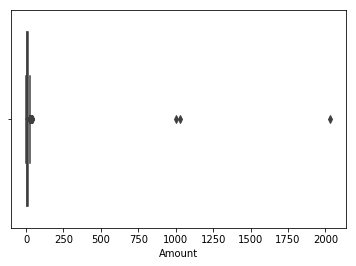

In [4]:
import matplotlib.pyplot as plt

#1. Are there any outliers?
print("======Step 2 Explore the dataset======")
print("------Step 2 Q1------")
print("There are outlier for \"Amount\":\n -Large outliers :2 outliers around 1000 and 1 outlier around 2000.")
print(" -Small outliers: 2 outliers less than 0.")
print()
print(str(clv[clv['Amount'] < 0]['Amount']))
import seaborn as sns
sns.boxplot(clv['Amount'])

In [5]:
#2 If so how would you treat them?
print("------Step 2 Q2------")
print("I would replace the outliers with median or mean of \"Amount\", here I replaced 5 outliers with median value \ngiving that median value is less sensitive to outliers. ")
median = float(clv['Amount'].median())
clv[clv['Amount'] > 250] = median
clv[clv['Amount'] < 0] = median
print()
print("The new standard descriptive statics is as follows:")
clv[['Amount']].describe()

------Step 2 Q2------
I would replace the outliers with median or mean of "Amount", here I replaced 5 outliers with median value 
giving that median value is less sensitive to outliers. 

The new standard descriptive statics is as follows:


,Amount
count,4186.000000
mean,8.066167
std,6.003162
min,0.010000
25%,3.320000
50%,6.885000
75%,11.660000
max,38.350000


In [6]:
print("======Step 3 Determine origin year of customers======")
print("The origin year of customer can be achieved by \"grouping by\" and ranking customerID and TransactionDate.")
clv2 = clv.copy()
clv2['TransactionDate']= pd.to_datetime(clv2['TransactionDate'])
clv2["rank"] = clv2.groupby("CustomerID")["TransactionDate"].rank(ascending=True)
clv2.set_index('TransactionDate',inplace=True)
clv2['Transaction_year'] = clv2.index.year
clv2['Transaction_month'] = clv2.index.month
origin_year = clv2[clv2['rank'] == 1][['CustomerID','Transaction_year']]
clv_originyr = clv.merge(origin_year, on = 'CustomerID')
clv_originyr.columns = ['TransactionID','TransactionDate','CustomerID','Amount','Origin_year']
clv_originyr.head()

======Step 3 Determine origin year of customers======
The origin year of customer can be achieved by "grouping by" and ranking customerID and TransactionDate.


,TransactionID,TransactionDate,CustomerID,Amount,Origin_year
0,1.0,9/4/2012,1.0,20.26,2012
1,2.0,5/15/2012,2.0,10.87,2012
2,3.0,5/23/2014,2.0,2.21,2012
3,4.0,10/24/2014,2.0,10.48,2012
4,5.0,10/13/2012,2.0,3.94,2012


In [7]:
print("======Step 4 Calculate cumulative transaction amounts======")
print("The cumulative trasaction can be caculated as follows:")
clv_originyr['TransactionDate'] = pd.to_datetime(clv_originyr['TransactionDate'], errors='coerce', format = '%m/%d/%Y')
clv_originyr.set_index('TransactionDate',inplace=True)
clv_originyr['Transaction_year'] = clv_originyr.index.year
clv_originyr['month'] = (clv_originyr['Transaction_year'] - clv_originyr['Origin_year'] + 1)*12
clv_originyr['month'] = clv_originyr['month'].astype(str)
z = clv_originyr.groupby(by=['Origin_year','month']).sum().groupby(level=[0]).cumsum()[['Amount']]
f = pd.pivot_table(z, index=["Origin_year"], columns=["month"], values=["Amount"])
print(f)

======Step 4 Calculate cumulative transaction amounts======
The cumulative trasaction can be caculated as follows:
              Amount                                             
month             12       24       36       48       60       72
Origin_year                                                      
2010         2259.67  3614.78  5274.81  6632.37  7930.69  8964.49
2011         2238.46  3757.90  5465.99  6703.11  7862.24      NaN
2012         2168.32  3861.66  5213.83  6463.40      NaN      NaN
2013         2159.05  3589.01  5190.98      NaN      NaN      NaN
2014         1830.85  3262.05      NaN      NaN      NaN      NaN
2015         1912.17      NaN      NaN      NaN      NaN      NaN


In [8]:
print("======Step 5 Calculate cumulative transaction ======")
print("The number of new customers by origin year in each year is as follows:\n")
z1 = origin_year.groupby(by=['Transaction_year']).count()
z11 = z1.values.tolist()
z22 = []
for x in range(len(z11)):
    z22.append(z11[x]*int((6-x)))
new_customer = pd.DataFrame(z22, index= [2010,2011,2012,2013,2014,2015], columns=[i*12 for i in range(1,7)]) 
print(new_customer)

======Step 5 Calculate cumulative transaction ======
The number of new customers by origin year in each year is as follows:

       12     24     36     48     60     72
2010  172  172.0  172.0  172.0  172.0  172.0
2011  170  170.0  170.0  170.0  170.0    NaN
2012  162  162.0  162.0  162.0    NaN    NaN
2013  179  179.0  179.0    NaN    NaN    NaN
2014  155  155.0    NaN    NaN    NaN    NaN
2015  160    NaN    NaN    NaN    NaN    NaN


======Step Step 6: Historic CLV ======
The Historic CLV is as follows:

Age                 12         24         36         48         60         72
Origin_year                                                                  
2010         13.137616  21.016163  30.667500  38.560291  46.108663  52.119128
2011         13.167412  22.105294  32.152882  39.430059  46.248471        NaN
2012         13.384691  23.837407  32.184136  39.897531        NaN        NaN
2013         12.061732  20.050335  28.999888        NaN        NaN        NaN
2014         11.811935  21.045484        NaN        NaN        NaN        NaN
2015         11.951062        NaN        NaN        NaN        NaN        NaN

The Historic CLV that weighted by the number of customers in each group as belows:

Age
12    12.585742
24    21.610937
36    31.001102
48    39.295960
60    46.178567
72    52.119128
dtype: float64


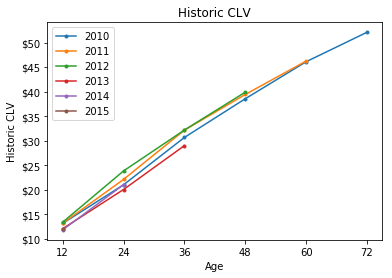

In [9]:
print("======Step Step 6: Historic CLV ======")
print("The Historic CLV is as follows:\n")
z2 = f.div(z1['CustomerID'],axis = 0)
z2.columns = z2.columns.droplevel()
z2.columns.name = 'Age'
print(z2)


import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

rr = z2.T
fig, ax = plt.subplots()
ax.plot(rr,marker='.')
formatter = ticker.FormatStrFormatter('$%1.0f')
ax.yaxis.set_major_formatter(formatter)
plt.legend(rr.columns)
plt.title('Historic CLV')
plt.xlabel("Age")
plt.ylabel('Historic CLV')

print("\nThe Historic CLV that weighted by the number of customers in each group as belows:\n")
print(z2.mean())

In [10]:
print("======Step Step 7: Interpreting your results ======")
print("Q1: How much have customers acquired in 2011 spent to date?")
print("- From the step 4 cumulative trasaction value we can get 7862.24 total spent to date amount for customers acquired in 2011.")

print("\nQ2: Do each group of customers exhibit similar or different patterns of spending? What’s the implication for the business?")
print('''- Each group seems have the same pattern. Customers who join in the later year seems spent less than weight average amount without considering inflation. This is an indicator that retained customers are loyal and the \ncompany has strong retentions. 
      \n- The group of 2nd year customers make 70% more transactions on average than the 1st year customers combined (21.6 for age 24 compared to 12.5 for age 12). Similarly 3rd year customers spent 47% more than 2nd year customers; the likelyhood percentage is 25%, 18%, 13% for 4th, 5th, 6th year customers compared to 3rd, 4th, 5th year customers. This indicates that customers tend to purchase more for the first 3 years or the retention power lasts for 3 years.  
      \n- Thus the company should focus on more acquiring new customers giving that they will maintain similar purchase pattern. Secondly the company has strong retention and retention power is around 3 years, good evergreen customer acquisition can support the company's growth in a long run. \n 
      ''')


======Step Step 7: Interpreting your results ======
Q1: How much have customers acquired in 2011 spent to date?
- From the step 4 cumulative trasaction value we can get 7862.24 total spent to date amount for customers acquired in 2011.

Q2: Do each group of customers exhibit similar or different patterns of spending? What’s the implication for the business?
- Each group seems have the same pattern. Customers who join in the later year seems spent less than weight average amount without considering inflation. This is an indicator that retained customers are loyal and the 
company has strong retentions. 
      
- The group of 2nd year customers make 70% more transactions on average than the 1st year customers combined (21.6 for age 24 compared to 12.5 for age 12). Similarly 3rd year customers spent 47% more than 2nd year customers; the likelyhood percentage is 25%, 18%, 13% for 4th, 5th, 6th year customers compared to 3rd, 4th, 5th year customers. This indicates that customers tend to pu